In [4]:
%pip install -U hopsworks --quiet
%pip install torch --extra-index-url https://download.pytorch.org/whl/cpu 
%pip install networkx

import torch
import os 
import sys

torch.cuda.is_available()
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

%pip install torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
%pip install torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
%pip install git+https://github.com/pyg-team/pytorch_geometric.git
%pip install torch-geometric -f https://data.pyg.org/whl/torch-${TORCH}.html

import hopsworks
import joblib


#!{sys.executable} -m pip install torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
#!{sys.executable} -m pip install torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
#!{sys.executable} -m pip install git+https://github.com/pyg-team/pytorch_geometric.git
#!{sys.executable} -m pip install torch-geometric -f https://data.pyg.org/whl/torch-${TORCH}.html




Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Sim\anaconda3\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Sim\anaconda3\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.
1.10.1+cpu


You should consider upgrading via the 'c:\Users\Sim\anaconda3\python.exe -m pip install --upgrade pip' command.


Looking in links: https://data.pyg.org/whl/torch-1.10.1+cpu.htmlNote: you may need to restart the kernel to use updated packages.



You should consider upgrading via the 'c:\Users\Sim\anaconda3\python.exe -m pip install --upgrade pip' command.


Looking in links: https://data.pyg.org/whl/torch-1.10.1+cpu.html
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Sim\anaconda3\python.exe -m pip install --upgrade pip' command.


  Cloning https://github.com/pyg-team/pytorch_geometric.git to c:\users\sim\appdata\local\temp\pip-req-build-rorkalem
  Resolved https://github.com/pyg-team/pytorch_geometric.git to commit 6869275ae8aabe000d80b2dbec311c58cf836469
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none -q https://github.com/pyg-team/pytorch_geometric.git 'C:\Users\Sim\AppData\Local\Temp\pip-req-build-rorkalem'
You should consider upgrading via the 'c:\Users\Sim\anaconda3\python.exe -m pip install --upgrade pip' command.


Looking in links: https://data.pyg.org/whl/torch-1.10.1+cpu.html
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Sim\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
import datetime
from datetime import date
import pandas as pd

BEGIN_DATE = "2018-06-13"
END_DATE = "2018-06-18"

start_date = pd.datetime.fromisoformat(BEGIN_DATE)
end_date =  pd.datetime.fromisoformat(END_DATE)
print(start_date)
print(end_date)

def date_to_timestamp(date_obj: datetime)-> int:
    return int(date_obj.timestamp() * 1000)

#start_date = (datetime.datetime.now() - datetime.timedelta(hours=24))  
#end_date = (datetime.datetime.now()) 
start_date = date_to_timestamp(start_date)
end_date =  date_to_timestamp(end_date)

2018-06-13 00:00:00
2018-06-18 00:00:00


In [4]:
project = hopsworks.login()
fs = project.get_feature_store()
mr = project.get_model_registry()

#start_date = (datetime.datetime.now() - datetime.timedelta(hours=48)) 
#end_date = (datetime.datetime.now()) 
print(start_date)
print(end_date)


feature_view = fs.get_feature_view("trans_fraud", 1)
feature_view.init_batch_scoring(training_dataset_version=2)

#print(feature_view.get_batch_query())

n = 5 
transactions_df = feature_view.get_batch_data(start_time = start_date, end_time = end_date)
#transactions_df = feature_view.preview_feature_vectors(n, external=None)

transactions_df

1528848000000
1529280000000


,transaction_id,tx_datetime,customer_id,terminal_id,tx_amount,tx_time_seconds,tx_time_days,tx_fraud_scenario,tx_during_weekend,tx_during_night,...,customer_id_nb_tx_7day_window,customer_id_avg_amount_7day_window,customer_id_nb_tx_30day_window,customer_id_avg_amount_30day_window,terminal_id_nb_tx_1day_window,terminal_id_risk_1day_window,terminal_id_nb_tx_7day_window,terminal_id_risk_7day_window,terminal_id_nb_tx_30day_window,terminal_id_risk_30day_window
0,727999,1529090730000,890,1879,0.009146,0.100490,13,3,1,1,...,0.372549,0.089978,0.644295,0.138991,0.111111,0.0,0.208333,0.0,0.275362,0.000000
1,716413,1528987147000,1356,1677,0.110657,0.033882,16,3,1,1,...,0.549020,0.186265,0.832215,0.318820,0.000000,0.0,0.250000,0.0,0.347826,0.000000
2,742414,1529232109000,2556,9135,0.025949,0.191403,9,3,0,1,...,0.607843,0.044058,0.738255,0.055835,0.000000,0.0,0.125000,0.0,0.318841,0.000000
3,737685,1529176483000,4270,6859,0.017435,0.155633,3,3,0,1,...,0.607843,0.042501,0.724832,0.052757,0.111111,0.0,0.333333,0.0,0.318841,0.037048
4,732858,1529146369000,1791,3367,0.006041,0.136268,3,3,0,1,...,0.470588,0.040759,0.832215,0.052516,0.111111,0.0,0.291667,0.0,0.507246,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38434,728256,1529093946000,4100,5702,0.080446,0.102558,13,3,1,1,...,0.058824,0.156171,0.060403,0.326062,0.222222,0.0,0.250000,0.0,0.217391,0.000000
38435,736058,1529163563000,4602,8405,0.134216,0.147325,3,3,0,1,...,0.215686,0.200793,0.295302,0.351165,0.222222,0.0,0.250000,0.0,0.434783,0.000000
38436,732300,1529143654000,879,3792,0.023403,0.134522,3,3,0,1,...,0.568627,0.049432,0.838926,0.058912,0.000000,0.0,0.250000,0.0,0.362319,0.000000
38437,743084,1529235517000,667,5505,0.033831,0.193594,9,3,0,1,...,0.490196,0.034551,0.563758,0.055412,0.111111,0.0,0.208333,0.0,0.478261,0.000000


In [1]:
#!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
#!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
#!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git
#!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-${TORCH}.html
#!pip install torch-geometric -f https://data.pyg.org/whl/torch-${TORCH}.html

# Helper function for visualization.
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

from torch_geometric.nn import GCNConv
import torch.nn.functional as F


the_model = mr.get_model("fraud", version=4)
model_dir = the_model.download()
print(model_dir)

class Config:
    seed = 0
    learning_rate = 0.001
    weight_decay = 1e-5
    input_dim = 15
    output_dim = 1
    hidden_size = 128
    num_epochs = 100
    checkpoints_dir = './models/elliptic_gnn'
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
print("Using device:", Config.device)

1.10.0+cpu


'{sys.executable}' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.
'{sys.executable}' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


  Cloning https://github.com/pyg-team/pytorch_geometric.git to c:\users\sim\appdata\local\temp\pip-req-build-4n9u2qxa
  Running setup.py bdist_wheel for torch-geometric: started
  Running setup.py bdist_wheel for torch-geometric: finished with status 'done'
  Stored in directory: C:\Users\Sim\AppData\Local\Temp\pip-ephem-wheel-cache-yg1k1d60\wheels\f6\21\87\d338c1cb67a213a7a10393dec89ec0b19087ae0fdb3a94e0f2
Successfully built torch-geometric


You are using pip version 18.1, however version 22.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
'{sys.executable}' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.
UsageError: Line magic function `%` not found.


In [7]:
import __main__

from torch_geometric.nn import GCNConv, GATv2Conv
import torch.nn.functional as F

class GCN(torch.nn.Module):
    """Graph Convolutional Network"""
    def __init__(self, dim_in, dim_h, dim_out):
        super(GCN, self).__init__()
        
        self.gcn1 = GCNConv(dim_in, dim_h)
        self.gcn2 = GCNConv(dim_h, dim_out)
        
    def forward(self, x, edge_index):
        h = self.gcn1(x, edge_index)
        h = torch.relu(h)
        h = F.dropout(h, p=0.6, training=self.training)
        out = self.gcn2(h, edge_index)
        return out

model = joblib.load(model_dir + "/model_model.pkl")

In [8]:
features_df = transactions_df.copy().drop(columns='tx_datetime')
features_df

,transaction_id,customer_id,terminal_id,tx_amount,tx_time_seconds,tx_time_days,tx_fraud_scenario,tx_during_weekend,tx_during_night,customer_id_nb_tx_1day_window,...,customer_id_nb_tx_7day_window,customer_id_avg_amount_7day_window,customer_id_nb_tx_30day_window,customer_id_avg_amount_30day_window,terminal_id_nb_tx_1day_window,terminal_id_risk_1day_window,terminal_id_nb_tx_7day_window,terminal_id_risk_7day_window,terminal_id_nb_tx_30day_window,terminal_id_risk_30day_window
0,727999,890,1879,0.009146,0.100490,13,3,1,1,0.307692,...,0.372549,0.089978,0.644295,0.138991,0.111111,0.0,0.208333,0.0,0.275362,0.000000
1,716413,1356,1677,0.110657,0.033882,16,3,1,1,0.461538,...,0.549020,0.186265,0.832215,0.318820,0.000000,0.0,0.250000,0.0,0.347826,0.000000
2,742414,2556,9135,0.025949,0.191403,9,3,0,1,0.307692,...,0.607843,0.044058,0.738255,0.055835,0.000000,0.0,0.125000,0.0,0.318841,0.000000
3,737685,4270,6859,0.017435,0.155633,3,3,0,1,0.307692,...,0.607843,0.042501,0.724832,0.052757,0.111111,0.0,0.333333,0.0,0.318841,0.037048
4,732858,1791,3367,0.006041,0.136268,3,3,0,1,0.307692,...,0.470588,0.040759,0.832215,0.052516,0.111111,0.0,0.291667,0.0,0.507246,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38434,728256,4100,5702,0.080446,0.102558,13,3,1,1,0.076923,...,0.058824,0.156171,0.060403,0.326062,0.222222,0.0,0.250000,0.0,0.217391,0.000000
38435,736058,4602,8405,0.134216,0.147325,3,3,0,1,0.000000,...,0.215686,0.200793,0.295302,0.351165,0.222222,0.0,0.250000,0.0,0.434783,0.000000
38436,732300,879,3792,0.023403,0.134522,3,3,0,1,0.384615,...,0.568627,0.049432,0.838926,0.058912,0.000000,0.0,0.250000,0.0,0.362319,0.000000
38437,743084,667,5505,0.033831,0.193594,9,3,0,1,0.384615,...,0.490196,0.034551,0.563758,0.055412,0.111111,0.0,0.208333,0.0,0.478261,0.000000


In [9]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

train_df = features_df
test= train_df[['transaction_id','tx_amount','customer_id','terminal_id']]
test = test.reset_index(drop=True)
print( test.head(2))

test['abs_tx_amount'] = test['tx_amount'].abs()
print( test.shape)

df_edges = pd.DataFrame(columns=['txId1','txId2'])

#grouped = test.groupby('tx_amount')
grouped = test.groupby(['abs_tx_amount','customer_id'])
for name,group in grouped:
    if group.shape[0] >= 2:
        res = group.transpose().agg(np.mean)
        feature_to_comp = ['abs_tx_amount','terminal_id']
        tradeoff = 1 - 0.2
        temp_group_df = group[feature_to_comp].copy()
        cosine = cosine_similarity(temp_group_df)
        customers = group.customer_id.unique()
        for value in customers :
            rest = group.loc[group['customer_id'] == value]
        # make edge between each row trxid if cosine > tradeoff
        result = np.where(cosine >  tradeoff)
        for i in range(len(result[0])):
            if result[0][i] != result[1][i] : 
                df_edges = df_edges.append({'txId1': group.iloc[result[0][i]].name,'txId2':group.iloc[result[1][i]].name}, ignore_index=True)



mapping = {idx: i for i, idx in enumerate(test.transaction_id)}

# mapping nodes to indices
nodes = test.transaction_id.values
map_id = {i:j for i,j in enumerate(nodes)}

edges = df_edges.copy()
print(edges.head())
print(edges.txId1[0])
print(edges.txId2[0])

edges['txId1'] =  edges['txId1'].astype(int) #  edges['txId1'].map(map_id)
edges['txId2'] = edges['txId2'].astype(int) # .map(map_id)
print(edges.head())

edge_index = np.array(edges.values).T
edge_index = torch.tensor(edge_index, dtype=torch.long).contiguous()

# weights for the edges are equal in case of model without attention
weights = torch.tensor([1] * edge_index.shape[1] , dtype=torch.float32)
print("Total amount of edges in DAG:", edge_index.shape)

   transaction_id  tx_amount  customer_id  terminal_id
0          727999   0.009146          890         1879
1          716413   0.110657         1356         1677
(38439, 5)
   txId1  txId2
0    984  20480
1  20480    984
2   3547  25351
3  25351   3547
4  15765  29873
984
20480
   txId1  txId2
0    984  20480
1  20480    984
2   3547  25351
3  25351   3547
4  15765  29873
Total amount of edges in DAG: torch.Size([2, 138])


In [10]:
# maping node ids to corresponding indexes

node_features = train_df.reset_index(drop=True).copy() #.drop(['txId'], axis=1).copy()
node_features[0] = node_features.index.map(map_id)
node_features['tx_fraud'] = 0


output_feature="TX_FRAUD"
output_feature=output_feature.lower()

input_features=['TX_AMOUNT','TX_DURING_WEEKEND', 'TX_DURING_NIGHT', 'CUSTOMER_ID_NB_TX_1DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW', 'CUSTOMER_ID_NB_TX_7DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW', 'CUSTOMER_ID_NB_TX_30DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW', 'TERMINAL_ID_NB_TX_1DAY_WINDOW',
       'TERMINAL_ID_RISK_1DAY_WINDOW', 'TERMINAL_ID_NB_TX_7DAY_WINDOW',
       'TERMINAL_ID_RISK_7DAY_WINDOW', 'TERMINAL_ID_NB_TX_30DAY_WINDOW',
       'TERMINAL_ID_RISK_30DAY_WINDOW']

input_features=[x.lower() for x in input_features]
print(input_features)


print(node_features.index)
print(node_features.head(5))

print( node_features.tx_fraud.value_counts())

classified_idx = node_features.sample(frac=0.75, replace=False, random_state=1).index
#classified_idx = node_features.iloc[:].index
print(classified_idx)

#classified_idx = node_features['tx_fraud'].loc[node_features['tx_fraud']==0].index
temp_list = ~node_features.index.isin(classified_idx)
unclassified_idx = node_features[temp_list].index  #temp_list.loc[temp_list['tx_fraud']==0].index

# replace unkown class with 0, to avoid having 3 classes, this data/labels never used in training
# node_features['tx_fraud'] = node_features['tx_fraud'].replace(2, 0) 

labels = node_features['tx_fraud'].values

# drop indeces, class and temporal axes 
node_features = torch.tensor(np.array(node_features[input_features].values, dtype=np.float32), dtype=torch.float32)
print(node_features.shape)

['tx_amount', 'tx_during_weekend', 'tx_during_night', 'customer_id_nb_tx_1day_window', 'customer_id_avg_amount_1day_window', 'customer_id_nb_tx_7day_window', 'customer_id_avg_amount_7day_window', 'customer_id_nb_tx_30day_window', 'customer_id_avg_amount_30day_window', 'terminal_id_nb_tx_1day_window', 'terminal_id_risk_1day_window', 'terminal_id_nb_tx_7day_window', 'terminal_id_risk_7day_window', 'terminal_id_nb_tx_30day_window', 'terminal_id_risk_30day_window']
RangeIndex(start=0, stop=38439, step=1)
   transaction_id  customer_id  terminal_id  tx_amount  tx_time_seconds  \
0          727999          890         1879   0.009146         0.100490   
1          716413         1356         1677   0.110657         0.033882   
2          742414         2556         9135   0.025949         0.191403   
3          737685         4270         6859   0.017435         0.155633   
4          732858         1791         3367   0.006041         0.136268   

   tx_time_days  tx_fraud_scenario  tx_duri

In [11]:
from torch_geometric.data import Data, DataLoader

print(node_features.shape)
 
print(labels.shape)

# converting data to PyGeometric graph data format
elliptic_dataset = Data(x = node_features, 
                        edge_index = edge_index, 
                        edge_attr = weights,
                        y = torch.tensor(labels, dtype=torch.float32)) 

print(f'Number of nodes: {elliptic_dataset.num_nodes}')
print(f'Number of node features: {elliptic_dataset.num_features}')
print(f'Number of edges: {elliptic_dataset.num_edges}')
print(f'Number of edge features: {elliptic_dataset.num_features}')
print(f'Average node degree: {elliptic_dataset.num_edges / elliptic_dataset.num_nodes:.2f}')
print(f'Number of classes: {len(np.unique(elliptic_dataset.y))}')
print(f'Has isolated nodes: {elliptic_dataset.has_isolated_nodes()}')
print(f'Has self loops: {elliptic_dataset.has_self_loops()}')
print(f'Is directed: {elliptic_dataset.is_directed()}')

torch.Size([38439, 15])
(38439,)
Number of nodes: 38439
Number of node features: 15
Number of edges: 138
Number of edge features: 15
Average node degree: 0.00
Number of classes: 1
Has isolated nodes: True
Has self loops: False
Is directed: False


In [12]:
model = model.to(Config.device)

data_train = elliptic_dataset.to(Config.device)

out = model(elliptic_dataset.x, elliptic_dataset.edge_index)

preds = ((torch.sigmoid(out) > 0.5).float()*1).squeeze(1)

import numpy as np
unique, counts = np.unique(preds.detach().cpu().numpy(), return_counts=True)

In [13]:
transactions_df['prediction'] = preds.tolist()
results_df = transactions_df.copy()[["transaction_id","tx_datetime", "prediction"]]
results_df.loc[:,'batch_start_date'] = start_date
results_df
results_fg = fs.get_or_create_feature_group(
    name="fraud_results",
    version=1,
    description="Number of predicted frauds",
    primary_key=["transaction_id"],
    event_time="tx_datetime"
)
results_fg.insert(results_df)
results_df.loc[:,'batch_end_date'] = end_date
results_df

Uploading Dataframe: 0.00% |          | Rows 0/38439 | Elapsed Time: 00:00 | Remaining Time: ?

Launching offline feature group backfill job...
Backfill Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/3339/jobs/named/fraud_results_1_offline_fg_backfill/executions


,transaction_id,tx_datetime,prediction,batch_start_date,batch_end_date
0,727999,1529090730000,0.0,1528848000000,1529280000000
1,716413,1528987147000,0.0,1528848000000,1529280000000
2,742414,1529232109000,0.0,1528848000000,1529280000000
3,737685,1529176483000,0.0,1528848000000,1529280000000
4,732858,1529146369000,0.0,1528848000000,1529280000000
...,...,...,...,...,...
38434,728256,1529093946000,0.0,1528848000000,1529280000000
38435,736058,1529163563000,0.0,1528848000000,1529280000000
38436,732300,1529143654000,0.0,1528848000000,1529280000000
38437,743084,1529235517000,0.0,1528848000000,1529280000000


In [14]:
import numpy as np
unique, counts = np.unique(preds.detach().cpu().numpy(), return_counts=True)
print(np.asarray((unique, counts)).T)

[[0.0000e+00 3.8431e+04]
 [1.0000e+00 8.0000e+00]]


In [15]:
import pandas as pd
if counts.shape[0] == 1: 
  data = {'datetime': [start_date], 'num_predicted_fraud': [0]}
  df = pd.DataFrame.from_dict(data)
  print(df)
else :
  data = {'datetime': [start_date], 'num_predicted_fraud': [counts[1]]}
  df = pd.DataFrame.from_dict(data)
  print(df)

        datetime  num_predicted_fraud
0  1528848000000                    8


Write the number of predicted credit card frauds to a Feature Group


In [16]:
fraud_fg = fs.get_or_create_feature_group(
    name="xpredicted_fraud",
    version=1,
    description="Number of predicted frauds by day",
    primary_key=["datetime"],
    event_time="datetime"
)
print(df)
fraud_fg.insert(df)

        datetime  num_predicted_fraud
0  1528848000000                    8


Uploading Dataframe: 0.00% |          | Rows 0/1 | Elapsed Time: 00:00 | Remaining Time: ?

Launching offline feature group backfill job...
Backfill Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/3339/jobs/named/xpredicted_fraud_1_offline_fg_backfill/executions


(<hsfs.core.job.Job at 0x7fc9a5ae0310>, None)

Create a graph of the numer of suspected fraudulent transactions over time


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 3 to 1
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   datetime             4 non-null      int64
 1   num_predicted_fraud  4 non-null      int64
dtypes: int64(2)
memory usage: 96.0 bytes


<Figure size 1080x504 with 0 Axes>

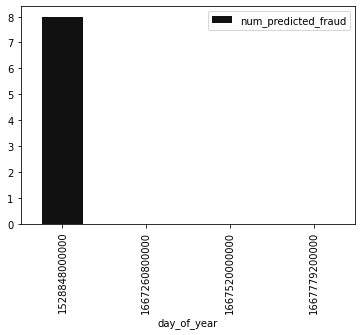

In [27]:
history_df = fraud_fg.read()
# Sort the historical fraud predictions by day
history_df = history_df.sort_values(by = ['datetime'])  
history_df.info()


history_df_temp = history_df['datetime']
history_df_temp.apply( lambda x : date.fromtimestamp( x/1000).timetuple().tm_yday)


history_df['day_of_year'] = history_df_temp

history_df
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

color='#111111'
plt.figure(figsize=(15, 7))

history_df.plot(kind='bar', x='day_of_year', y='num_predicted_fraud', color=color)

plt.savefig("../../assets/fraud_counts.png")
plt.show()

plt.close()